# Chapter 1: Getting Started with Python Polars 

## The Polars DataFrame

In [4]:
import polars as pl

### How to do it...

In [5]:
df = pl.DataFrame({
    'nums': [1,2,3,4,5],
    'letters': ['a','b','c','d','e']
})
df.head()

nums,letters
i64,str
1,"""a"""
2,"""b"""
3,"""c"""
4,"""d"""
5,"""e"""


In [6]:
df = pl.read_csv(r'../data/titanic_dataset.csv', truncate_ragged_lines=True)
df.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [7]:
df.schema

Schema([('PassengerId', Int64),
        ('Survived', Int64),
        ('Pclass', Int64),
        ('Name', String),
        ('Sex', String),
        ('Age', Float64),
        ('SibSp', Int64),
        ('Parch', Int64),
        ('Ticket', String),
        ('Fare', Float64),
        ('Cabin', String),
        ('Embarked', String)])

In [8]:
df.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [9]:
df.dtypes

[Int64,
 Int64,
 Int64,
 String,
 String,
 Float64,
 Int64,
 Int64,
 String,
 Float64,
 String,
 String]

In [10]:
df.shape

(891, 12)

In [11]:
df.height

891

In [12]:
df.width

12

In [13]:
df.flags

{'PassengerId': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'Survived': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'Pclass': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'Name': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'Sex': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'Age': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'SibSp': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'Parch': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'Ticket': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'Fare': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'Cabin': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'Embarked': {'SORTED_ASC': False, 'SORTED_DESC': False}}

### There is more...

In [14]:
import numpy as np

numpy_arr = np.array([[1,1,1], [2,2,2]])
df = pl.from_numpy(numpy_arr, schema={'ones': pl.Float32, 'twos': pl.Int8}, orient='col') 
df.head()

ones,twos
f32,i8
1.0,2
1.0,2
1.0,2


## The Polars Series

### How to do it...

In [15]:
s = pl.Series('col', [1,2,3,4,5])
s.head()

col
i64
1
2
3
4
5


In [16]:
data = {'a': [1,2,3], 'b': [4,5,6]}
s_a = (
    pl.DataFrame(data)
    .to_series()
)
s_a.head()

a
i64
1
2
3


In [17]:
s_b = (
    pl.DataFrame(data)
    .to_series(1)
)
s_b.head()

b
i64
4
5
6


In [18]:
s_b2 = (
    pl.DataFrame(data)
    .get_column('b')
)
s_b2.head()

b
i64
4
5
6


In [19]:
s.shape

(5,)

In [20]:
s.name

'col'

In [21]:
s.dtype

Int64

## The Polars LazyFrame

### How to do it...

In [22]:
data = {'name': ['Sarah',  'Mike', 'Bob', 'Ashley']}
lf = pl.LazyFrame(data) 
type(lf)

polars.lazyframe.frame.LazyFrame

In [23]:
lf.collect().head()

name
str
"""Sarah"""
"""Mike"""
"""Bob"""
"""Ashley"""


In [24]:
lf = pl.scan_csv(r'../data/titanic_dataset.csv')
lf.head().collect()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [25]:
df = pl.read_csv(r'../data/titanic_dataset.csv')
df.lazy().head(3).collect()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""


In [26]:
lf.collect_schema()

Schema([('PassengerId', Int64),
        ('Survived', Int64),
        ('Pclass', Int64),
        ('Name', String),
        ('Sex', String),
        ('Age', Float64),
        ('SibSp', Int64),
        ('Parch', Int64),
        ('Ticket', String),
        ('Fare', Float64),
        ('Cabin', String),
        ('Embarked', String)])

In [27]:
lf.collect_schema().len()

12

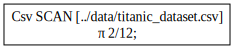

In [31]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

(
    lf
    .select(pl.col('Name', 'Age'))
    .show_graph()
)

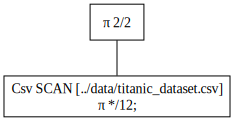

In [32]:
(
    lf
    .select(pl.col('Name', 'Age'))
    .show_graph(optimized=False)
)

In [33]:
(
    lf
    .select(pl.col('Name', 'Age'))
    .explain()
)

'Csv SCAN [../data/titanic_dataset.csv]\nPROJECT 2/12 COLUMNS'

In [34]:
print(
    lf
    .select(pl.col('Name', 'Age'))
    .explain()
    , sep='\n'
)

Csv SCAN [../data/titanic_dataset.csv]
PROJECT 2/12 COLUMNS


## Selecting columns and filtering data

### How to do it...

In [ ]:
df = pl.read_csv('../data/titanic_dataset.csv') 
df.head()

In [ ]:
df.select(['Survived', 'Ticket', 'Fare']).head()

In [ ]:
df.select(pl.col(['Survived', 'Ticket', 'Fare'])).head()

In [ ]:
df.select(
    pl.col('Survived'),
    pl.col('Ticket'),
    pl.col('Fare')
).head()

In [ ]:
df.with_columns(
    pl.col('Survived'),
    pl.col('Ticket'),
    pl.col('Fare')
).head()

In [ ]:
df.with_columns(['Survived', 'Ticket', 'Fare']).head()

In [ ]:
df.with_columns(
    pl.col('Survived'),
    pl.col('Ticket'),
    pl.col('Fare')
).head()

In [ ]:
df.filter((pl.col('Age') >= 30)).head()


In [ ]:
df.filter(
    (pl.col('Age') >= 30) & (pl.col('Sex')=='male')
).head()

### There is more...

In [ ]:
df[['Age', 'Sex']].head()

In [ ]:
df.select(pl.col('^[a-zA-Z]{0,4}$')).head()

In [ ]:
df.select(pl.col(pl.String)).head()

In [ ]:
import polars.selectors as cs

df.select(cs.numeric()).head()

In [ ]:
df.select(cs.matches('se|ed')).head()

## Creating, modifying, and deleting columns 

### How to do it...

In [ ]:
df = pl.read_csv('../data/titanic_dataset.csv')
df.head()

In [ ]:
df.with_columns(
    pl.col('Fare').max().alias('Max Fare')
).head()

In [ ]:
df.with_columns(
    max_fare=pl.col('Fare').max()
).head()

In [ ]:
df.with_columns(
    (pl.col('Fare').max() - pl.col('Fare').mean()).alias('Max Fare - Avg Fare')
).head()

In [ ]:
df.with_columns(pl.lit('Titanic')).head()

In [ ]:
df.with_row_index().head()

In [ ]:
df.with_columns(pl.col('Sex').str.to_titlecase()).head()

In [ ]:
df.with_columns( 
    pl.col('Fare').max() 
).head() 

In [ ]:
df.drop(['Pclass', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']).head()

In [ ]:
df.select(['PassengerId', 'Survived', 'Sex', 'Age', 'Fare']).head()

### There is more...

In [ ]:
best_practice = (
    df.with_columns(
        pl.col('Fare').max().alias('Max Fare'),
        pl.lit('Titanic'),
        pl.col('Sex').str.to_titlecase()
    )
)
best_practice.head()

In [ ]:
not_so_good_practice = (
    df
    .with_columns(pl.col('Fare').max().alias('Max Fare'))
    .with_columns(pl.lit('Titanic'))
    .with_columns(pl.col('Sex').str.to_titlecase())
)
not_so_good_practice.head()

## Method chaining

### How to do it...

In [ ]:
df = pl.read_csv('../data/titanic_dataset.csv')
df.head()

In [57]:
cols = ['Name', 'Sex', 'Age', 'Fare', 'Cabin', 'Pclass', 'Survived']

In [ ]:
df = df.select(cols)
df = df.filter(pl.col('Age')>=35)
df = df.sort(by=['Age', 'Name'])
df.head()

In [ ]:
df = df.select(cols).filter(pl.col('Age')>=35).sort(by=['Age', 'Name'])
df.head()

In [ ]:
df = (
    df
    .select(cols)
    .filter(pl.col('Age')>=35)
    .sort(by=['Age', 'Name'])
)
df.head()

In [ ]:
df = (
    df
    .select(cols)
    # .filter(pl.col('Age')>=35)
    .sort(by=['Age', 'Name'])
)
df.head()

### There is more...

In [62]:
df = df \
    .select(cols) \
    .filter(pl.col('Age')>=35) \
    .sort(by=['Age', 'Name']) 

## Processing datasets larger than RAM

In [1]:
import polars as pl 

In [ ]:
taxi_trips = (
    pl.scan_csv('~/Downloads/Taxi_Trips.csv')
    .collect(streaming=True)
)
taxi_trips.head()

In [ ]:
trip_total_by_pay_type = (
    pl.scan_csv('~/Downloads/Taxi_Trips.csv')
    .group_by('Payment Type')
    .agg(pl.col('Trip Total').sum())
    .collect()
)
trip_total_by_pay_type.head()